<img src="matplotlib.png" width="90"/> 

# **matplotlib**

## Introduction to matplotlib

[**Matplotlib**](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python.

[**matplotlib.pyplot**](https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot) is a state-based interface to matplotlib. It provides an implicit, MATLAB-like, way of plotting.


* `plot()` plot y versus x as lines and/or markers
* `scatter()` scatter plot of y
* `bar()` make a bar plot
* `pie()` plot a pie chart
* `boxplot()` draw a box and whisker plot
* `hist()` compute and plot a histogram
* `legend()` place a legend on the Axes
* `xlabel()` set the label for the x-axis
* `ylabel()` set the label for the y-axis
* `title()` set a title for the Axes
* `plt.show()` display the plot

## Data investigation

### Data Loading

In [234]:
# Import pandas library
import pandas as pd

# Import the matplotlib.pyplot library
import matplotlib.pyplot as plt

# Load data from CSV file into the 'billionaires' dataframe
# Set the 'rank' column as the index
billionaires = pd.read_csv("data/billionaires.csv", index_col="rank")

# Load data from CSV file into the 'crimes' dataframe
crimes = pd.read_csv("data/us_crime_rates_1960_2014.csv")

# Load data from CSV file into the 'job' dataframe
job = pd.read_csv("data/salary.csv")


[Billionaires Statistics Dataset (2023)](https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset)

This dataset contains statistics on the world's billionaires, including information about their businesses, industries, and personal details. It provides insights into the wealth distribution, business sectors, and demographics of billionaires worldwide.

[US_Crime_Rates_1960_2014](https://www.kaggle.com/datasets/mahmoudshogaa/us-crime-rates-1960-2014)

The "1960_2014 Crimes Data" dataset contains information about reported crimes in US through the year 1960_2014. This dataset aims to provide insights into crime trends for analysis and predictive modeling. The data can be used for exploratory data analysis (EDA), trend identification, and forecasting future crime activities and rates. The dataset is particularly valuable for law enforcement agencies, researchers, and analysts interested in understanding crime dynamics.

[Salary by Job Title and Country](https://www.kaggle.com/datasets/amirmahdiabbootalebi/salary-by-job-title-and-country)

This dataset provides a comprehensive collection of salary information from various industries and regions across the globe. Sourced from reputable employment websites and surveys, it includes details on job titles, salaries, job sectors, geographic locations, and more. Analyze this data to gain insights into job market trends, compare compensation across different professions, and make informed decisions about your career or hiring strategies. The dataset is cleaned and preprocessed for ease of analysis and is available under an open license for research and data analysis purposes.

*Education Level:*

0 : High School

1 : Bachelor Degree

2 : Master Degree

3 : Phd

*Currency :* US Dollar

*Senior :* It shows that is this employee has a senior position or no.(Binary)

### General overview

In [235]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                55 non-null     int64
 1   Population          55 non-null     int64
 2   Total               55 non-null     int64
 3   Violent             55 non-null     int64
 4   Property            55 non-null     int64
 5   Murder              55 non-null     int64
 6   Forcible_Rape       55 non-null     int64
 7   Robbery             55 non-null     int64
 8   Aggravated_assault  55 non-null     int64
 9   Burglary            55 non-null     int64
 10  Larceny_Theft       55 non-null     int64
 11  Vehicle_Theft       55 non-null     int64
dtypes: int64(12)
memory usage: 5.3 KB


## Data Cleaning

In [236]:
# BILLIONAIRES
# Delete all unneccessary columns
billionaires = billionaires.iloc[:, :24]

# Convert 'finalWorth' to billions
billionaires["finalWorth"] = billionaires["finalWorth"] / 1000

# Convert selected columns to categorical data type
cols = ['category','country', 'city', 'industries', 'countryOfCitizenship','gender','state','residenceStateRegion','residenceStateRegion', 'status', 'source', 'organization']
for col in cols:
    billionaires[col] = billionaires[col].astype('category')

# Convert date columns to datetime format
billionaires["birthDate"] = pd.to_datetime(billionaires["birthDate"], format='mixed')
billionaires["date"] = pd.to_datetime(billionaires["date"], format='mixed')

# JOB
# Convert selected columns to categorical data type
cols2 = ['Gender','Education Level', 'Job Title', 'Country', 'Race','Senior']
for col in cols2:
    job[col] = job[col].astype('category')

## Line Chart

a graph that uses lines to connect individual data points. A line graph displays quantitative values over a specified time interval

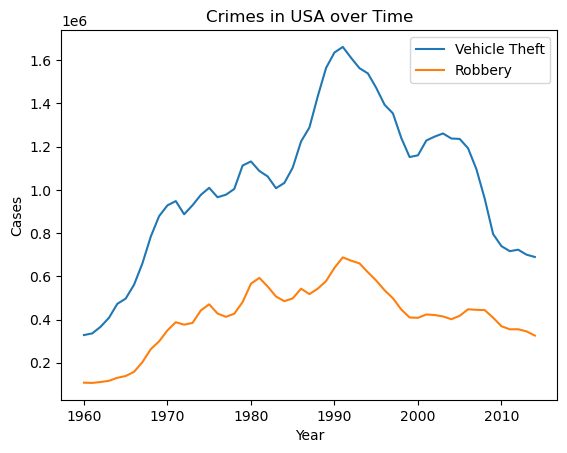

In [237]:
plt.title('Crimes in USA over Time')
plt.plot(crimes['Year'], crimes['Vehicle_Theft'], label='Vehicle Theft')
plt.plot(crimes['Year'], crimes['Robbery'], label='Robbery')
plt.xlabel('Year')
plt.ylabel('Cases')
plt.legend()
plt.show()

## Bar chart

graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent

In [222]:
# Calculate the count of billionaires for each country of citizenship and select the top 20
top_countries = billionaires['countryOfCitizenship'].value_counts().head(20)
top_countries

countryOfCitizenship
United States     735
China             491
India             169
Germany           126
Russia            104
Hong Kong          68
Italy              64
Canada             63
United Kingdom     52
Taiwan             52
Brazil             51
Australia          47
France             43
Switzerland        41
Japan              40
Sweden             39
Singapore          37
Israel             30
South Korea        30
Indonesia          29
Name: count, dtype: int64

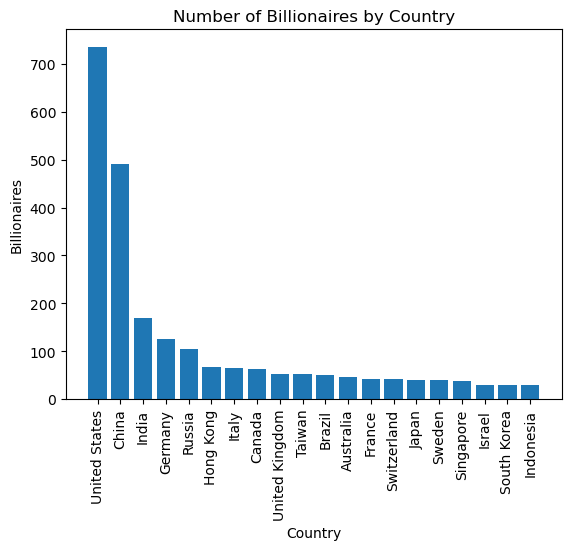

In [229]:
plt.bar(top_countries.index, top_countries.values)
plt.title('Number of Billionaires by Country')
plt.xlabel('Country')
plt.ylabel('Billionaires')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

## Histogram

type of chart that shows the frequency distribution of data points across a continuous range of numerical values

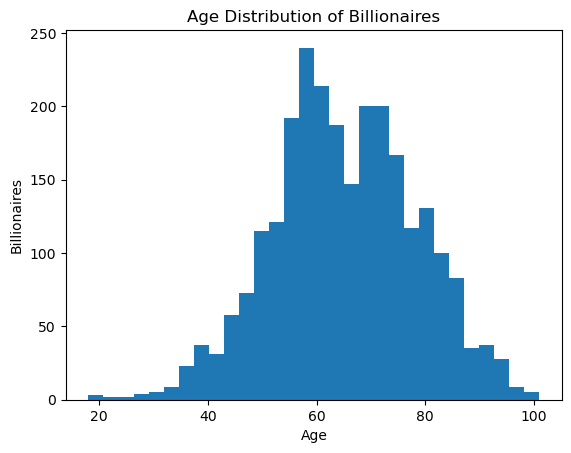

In [230]:
plt.hist(billionaires['age'], bins=30) 
plt.title('Age Distribution of Billionaires')
plt.xlabel('Age')
plt.ylabel('Billionaires')
plt.show()

## Scatter Plot

used to examine the relationship between both the axes (X and Y) with one variable

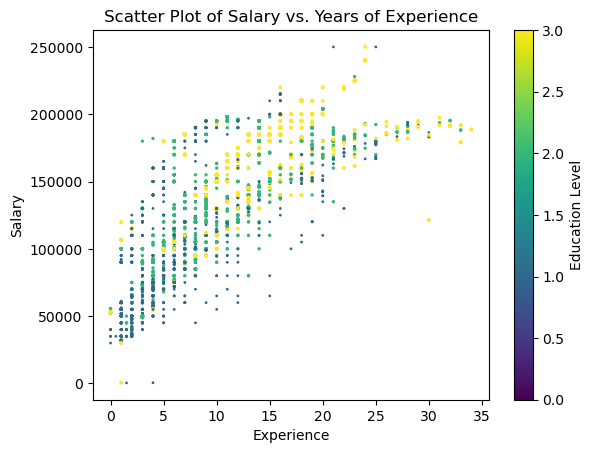

In [233]:
plt.scatter(job['Years of Experience'], job['Salary'], c=job['Education Level'], s=job['Education Level'])
plt.title('Scatter Plot of Salary vs. Years of Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.colorbar(label='Education Level')
plt.show()

## Boxplot

uses boxes and lines to depict the distributions of one or more groups of numeric data. Box limits indicate the range of the central 50% of the data, with a central line marking the median value. Lines extend from each box to capture the range of the remaining data, with dots placed past the line edges to indicate outliers

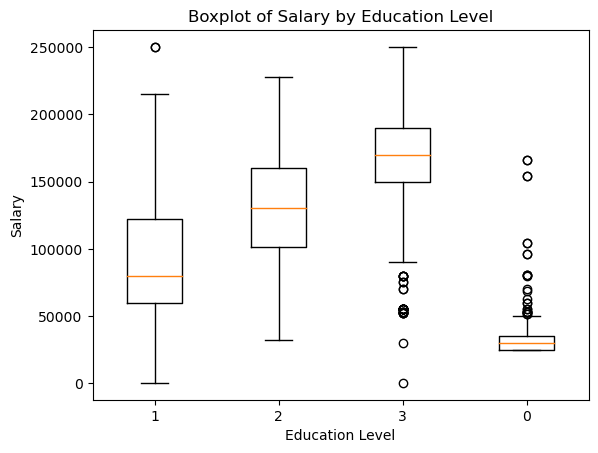

In [ ]:
data = [job[job['Education Level'] == level]['Salary'].tolist() for level in job['Education Level'].unique()]
plt.boxplot(data, labels=job['Education Level'].unique())
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.title('Boxplot of Salary by Education Level')
plt.show()

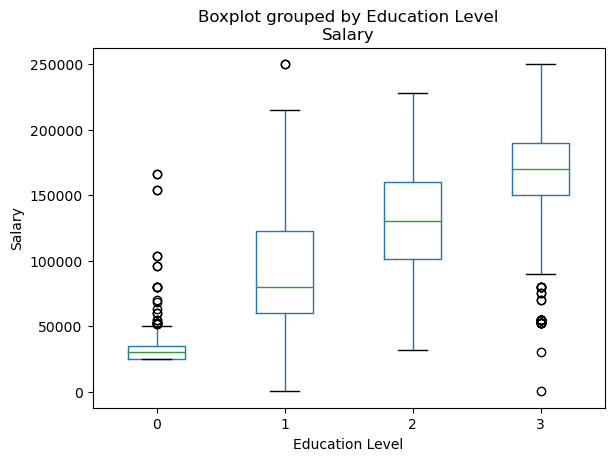

In [ ]:
# pandas
job.boxplot(column='Salary', by='Education Level', grid=False) 
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.show()

## Pie Chart

type of graph representing data in a circular form, with each slice of the circle representing a fraction or proportionate part of the whole

In [ ]:
# Calculate the counts of each gender
gender_counts = billionaires['gender'].value_counts()

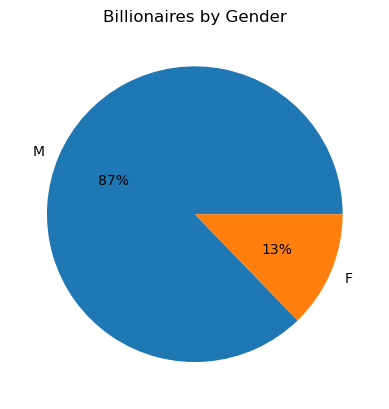

In [ ]:
plt.pie(gender_counts, labels=gender_counts.index, autopct='%.f%%')
plt.title('Billionaires by Gender')
plt.show()